In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../clauo/train.csv")

In [4]:
# Devuelve información del DataFrame (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Devuelve las primeras 10 filas del DataFrame
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Devuelve un resumen estadístico del DataFrame 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Devuelve valores no numericos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Limpieza de los datos

In [8]:
# Para los registros no numerocos (NaN) de la columna Age, rellenamos con el promedio de edades
prom_edad=round(df['Age'].mean())
df['Age']=df['Age'].fillna(prom_edad)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Para los registros no numericos (NaN) de la columna Cabin, rellenamos con NE (No Especificado)
df['Cabin']=df['Cabin'].fillna('NE')
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [10]:
# Para los registros no numericos (NaN) de la columna Embarked, rellenamos con NE (No Especificado)
df['Embarked']=df['Embarked'].fillna('NE')
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
df['Age'].value_counts()

30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [12]:
df['Cabin'].value_counts()

NE             687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [13]:
df['Embarked'].value_counts()

S     644
C     168
Q      77
NE      2
Name: Embarked, dtype: int64

In [14]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NE,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NE,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NE,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NE,C


In [15]:
df['Survived']=df['Survived'].map({
    0: 'No',
    1: 'Yes'
})
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,S
5,6,No,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NE,Q
6,7,No,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,No,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NE,S
8,9,Yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NE,S
9,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NE,C


In [16]:
df['Embarked']=df['Embarked'].map({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,Southampton
5,6,No,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NE,Queenstown
6,7,No,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,Southampton
7,8,No,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NE,Southampton
8,9,Yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NE,Southampton
9,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NE,Cherbourg


# Estadísticas del DataFrame

In [17]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       No           80
        Yes         136
2       No           97
        Yes          87
3       No          372
        Yes         119
Name: Survived, dtype: int64

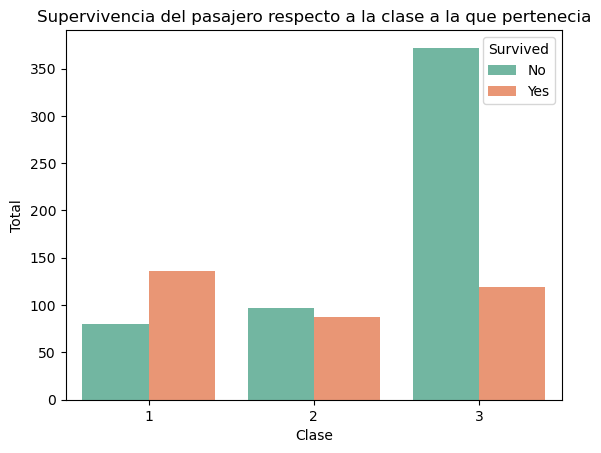

In [18]:
ax=sns.countplot(x='Pclass', hue='Survived', palette='Set2', data=df)
ax.set(title='Supervivencia del pasajero respecto a la clase a la que pertenecia', xlabel='Clase', ylabel='Total')
plt.show()

In [19]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  No           81
        Yes         233
male    No          468
        Yes         109
Name: Survived, dtype: int64

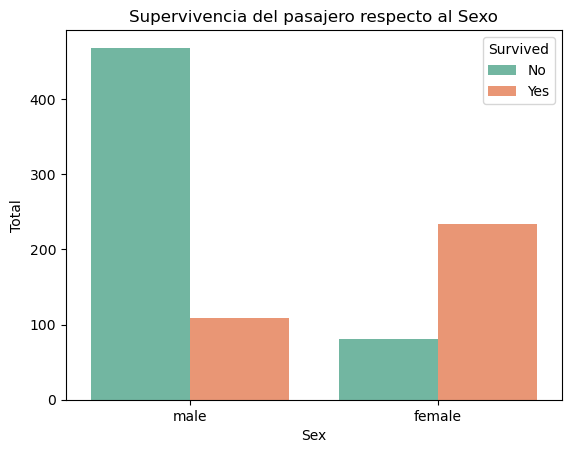

In [20]:
ax=sns.countplot(x='Sex', hue='Survived', palette='Set2', data=df)
ax.set(title='Supervivencia del pasajero respecto al Sexo', xlabel='Sex', ylabel='Total')
plt.show()

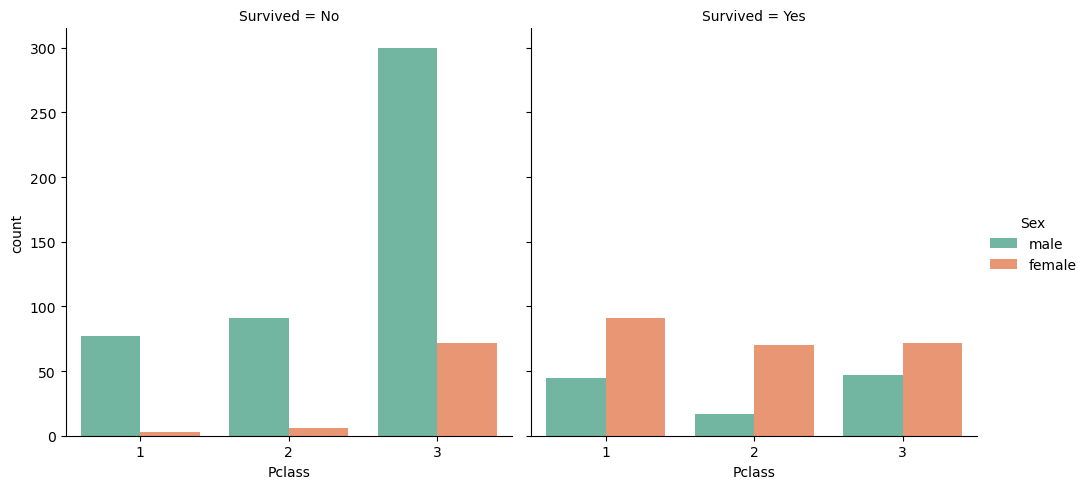

In [21]:
ax=sns.catplot(x='Pclass', hue='Sex', col='Survived', palette='Set2', data=df, kind="count")
plt.show()

In [22]:
# Devuelve la media de edades de cada cabina
aux=df.pivot_table(values='Age', index='Cabin', aggfunc='mean')
aux

,Age
Cabin,
A10,36.00000
A14,30.00000
A16,48.00000
A19,30.00000
A20,49.00000
...,...
F38,30.00000
F4,2.50000
G6,14.75000


In [23]:
# Devuelve una tabla de contingencia de las variables Embarked y Survived (sobrevivientes por lugar de embarque)
pd.crosstab(df['Embarked'], df['Survived'])

Survived,No,Yes
Embarked,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


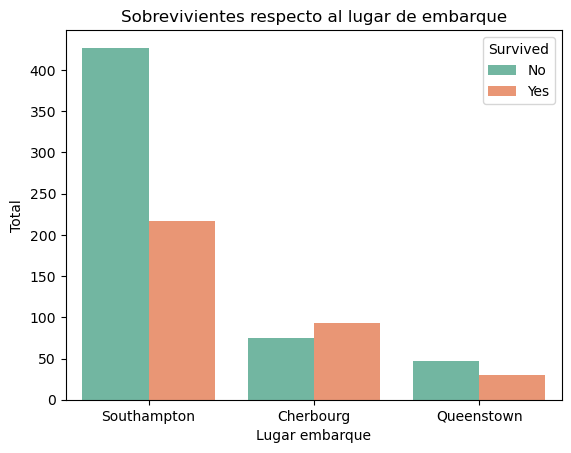

In [24]:
ax=sns.countplot(x='Embarked', hue='Survived', palette='Set2', data=df)
ax.set(title='Sobrevivientes respecto al lugar de embarque', xlabel='Lugar embarque', ylabel='Total')
plt.show()

In [25]:
df[df['Age']<18]['Age'].count()

113

In [26]:
intervalo_edad1=df[df['Age']<18].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervalo_edad1

,Age
Pclass,
1,12
2,23
3,78


In [27]:
intervalo_edad2=df[(df['Age']>=18) & (df['Age']<=50)].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervalo_edad2

,Age
Pclass,
1,165
2,146
3,403


In [28]:
intervalo_edad3=df[df['Age']>50].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervalo_edad3

,Age
Pclass,
1,39
2,15
3,10


In [29]:
def funcPie(values):
    val=iter(values)
    return lambda pct: f"{pct:.1f}% ({next(val)})"

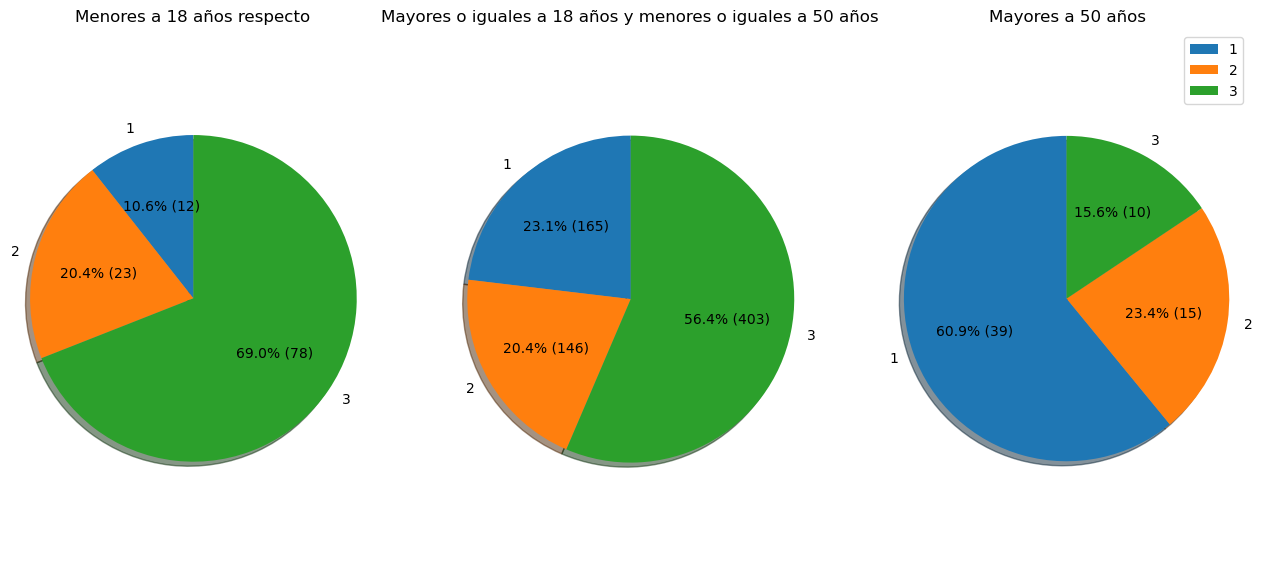

In [30]:
fig, ax=plt.subplots(1, 3, figsize=(16, 7))
ax[0].pie(intervalo_edad1['Age'].to_list(), labels=intervalo_edad1.index.to_list(),
          autopct=funcPie(intervalo_edad1['Age'].to_list()), shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Menores a 18 años respecto')
ax[1].pie(intervalo_edad2['Age'].to_list(), labels=intervalo_edad2.index.to_list(),
          autopct=funcPie(intervalo_edad2['Age'].to_list()), shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Mayores o iguales a 18 años y menores o iguales a 50 años')
ax[2].pie(intervalo_edad3['Age'].to_list(), labels=intervalo_edad3.index.to_list(),
          autopct=funcPie(intervalo_edad3['Age'].to_list()), shadow=True, startangle=90)
ax[2].axis('equal')
ax[2].set_title('Mayores a 50 años')
plt.legend()
plt.show()

In [31]:
# Devuelve la cantidad de pasajeros por Clase y por Sexo
aux=df.groupby(['Pclass', 'Sex'])['Pclass'].count()
aux

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Pclass, dtype: int64